# Preparation

In [1]:
# Reference: https://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script/15622021#15622021
import sys
sys.path.append(r'G:\Grid_Orientation\LISFLOOD_FP\Analysis\Modules')

In [2]:
from folder import *                                                # For paths of sub-folders

import pandas as pd                                                 # For dataframe manipulation

import matplotlib.pyplot as plt                                     # For plotting

from randomisation import random_transformation                     # For collecting transformation values

from rasterPolygon import raster_array_to_shapefile                 # For converting points from raster to shapefile

from depthValue import run_depth_value_extraction                   # For getting depth values of all simulations

from fileWriting import csv_generation                              # For writing files into csv and raster

from checkingDifference import get_diff, plot_diff, \
                               difference_information               # For checking the differences between 0 and 90

from runStatistic import calculation_dict                           # For generating statistical dictionary

from impact_analysis import one_polygon_raster_generation, \
                            one_polygon_generation                  # For calculating number of buildings being inundated

from colorSelection import *                                        # For color plotting

from statisticalPlot import plotting_map, \
                            plotting_histogram, \
                            plot_area, \
                            plot_building, \
                            scatter_area_transformation             # For plotting

from savePlot import save_plot                                      # For saving plots

-------------------------------------------------------------------------------------------------------------------------------

# Data preparation

In [3]:
# Transformation selection
transform_selection = "c"

# Time extract
time_extract = 48

# Resolution
resolution = 10

# Filter rate
filter_rate = 0.1

# Additional title
addition_title = ",\ncombination"

# Random transformation value
ran_trans = random_transformation(
    1,
    50,
    [0, 90],
    [0, resolution/2],
    [0, resolution/2],
    'uniform',
    True
)


# # Random transformation value
# # For test case
# ran_trans = random_transformation(
#     1,
#     1,
#     [0, 91, 10],
#     [0, 1, 1],
#     [0, 1, 1],
#     'systematic',
#     True
# )

# Building path
building_path = r"S:\LISFLOOD\buildings\nz-building-outlines-all-sources.shp"

-------------------------------------------------------------------------------------------------------------------------------

# Data Collection

In [4]:
# # Clip dataset and write out point polygon
# # clipped_dataset = raster_array_to_shapefile(transform_selection, "angle_0_x_0_y_0", time_extract, [200, 0, -200, 0])
# clipped_dataset = raster_array_to_shapefile(transform_selection, "angle_0_x_0_y_0", time_extract, [0, 0, 0, 0])

In [5]:
# # Get data dictionary with x, y coordinate values
# clipped_data_coordinate = {"x_coord": clipped_dataset[:, 0],
#                            "y_coord": clipped_dataset[:, 1]}

# # Get depth data list of all simulations
# run_depth_value_extraction(ran_trans,
#                            clipped_data_coordinate,
#                            transform_selection,
#                            time_extract)

# # Write data into pandas dataframe
# full_data = pd.DataFrame(data=clipped_data_coordinate)

# # Write data into csv file
# csv_generation(transform_selection, full_data)

-------------------------------------------------------------------------------------------------------------------------------

# Call data

In [6]:
full_data = pd.read_csv(fr"{csv_combination}\un_combined_file_1.csv")

-------------------------------------------------------------------------------------------------------------------------------

# Impact generation

In [7]:
# # Generate one poly rasters
# one_polygon_raster_generation(
#     transform_selection,
#     full_data,
#     filter_rate
# )

In [8]:
# %%time
# # Generate one polygons
# one_polygon_generation(
#     transform_selection,
#     full_data,
#     filter_rate
# )

-------------------------------------------------------------------------------------------------------------------------------

# Check differences between 0 and 90 degrees

In [9]:
# # Get a list of differences
# diff_list = get_diff(full_data)

# # Draw histogram
# fig, ax = plt.subplots(figsize=(12, 7))
# plot_diff(diff_list, ax, resolution, 20000)

# save_plot(
#     transform_selection,
#     fig,
#     f"Difference between 0 and 90",
#     'png',
#     50
# )

In [10]:
# difference_information(
#     full_data,
#     diff_list
# )

-------------------------------------------------------------------------------------------------------------------------------

# Statistical calculation

In [11]:
statistic_dict = calculation_dict(
    transform_selection, full_data,
    resolution, filter_rate,
    building_path
)

-------------------------------------------------------------------------------------------------------------------------------

# Plotting

In [12]:
# statistical_selection = 'mean'

In [13]:
# if statistical_selection == 'mean':
#     a = [0.1, 4, 0.1]
#     b = [0.1, 4, 0.4]
#     c = np.arange(0.1, 3.9, 0.1)
#     color_selection = hex_list9
#     x_upper_limit_sign = "+"
#     y_upper_limit = None
    
# elif statistical_selection == 'sd':
#     a = [0.01, 0.6, 0.1]
#     b = [0.01, 0.6, 0.1]
#     c = np.arange(0.01, 0.55, 0.02)
#     color_selection = hex_list87
#     x_upper_limit_sign = "+"
#     y_upper_limit = None
    
# elif statistical_selection == 'cv':
#     a = [0.1, 80, 10]
#     b = [0.1, 80, 10]
#     c = np.arange(0.1, 73, 2)
#     color_selection = hex_list77
#     x_upper_limit_sign = "+"
#     y_upper_limit = None

# else:
#     a = [0, 102, 20]
#     b = [0, 102, 20]
#     c = np.arange(0, 102, 2)
#     color_selection = hex_list90
#     x_upper_limit_sign = ""
#     y_upper_limit = 1000

In [14]:

# plotting_map(
#     statistic_dict[statistical_selection],
#     resolution,
#     statistical_selection,
#     ax,
#     fig,
#     color_selection,
#     "horizontal",
#     "max",
# #     None,
#     a,
#     addition_title
# )

# save_plot(
#     transform_selection,
#     fig,
#     statistical_selection,
#     'png',
#     300
# )

In [15]:
# plotting_histogram(
#     statistic_dict[statistical_selection],
#     resolution,
#     statistical_selection,
#     plt, ax,
#     color_selection,
#     b,
#     c,
#     x_upper_limit_sign,
#     y_upper_limit,
#     addition_title
# )

# save_plot(
#     transform_selection,
#     fig,
#     f"{statistical_selection} histogram",
#     'png',
#     300
# )

Maximum area: 281100
Minimum area: 235700
Mean of number of buildings: 251226.0
Standard deviation of number of buildings: 7610.37986125877


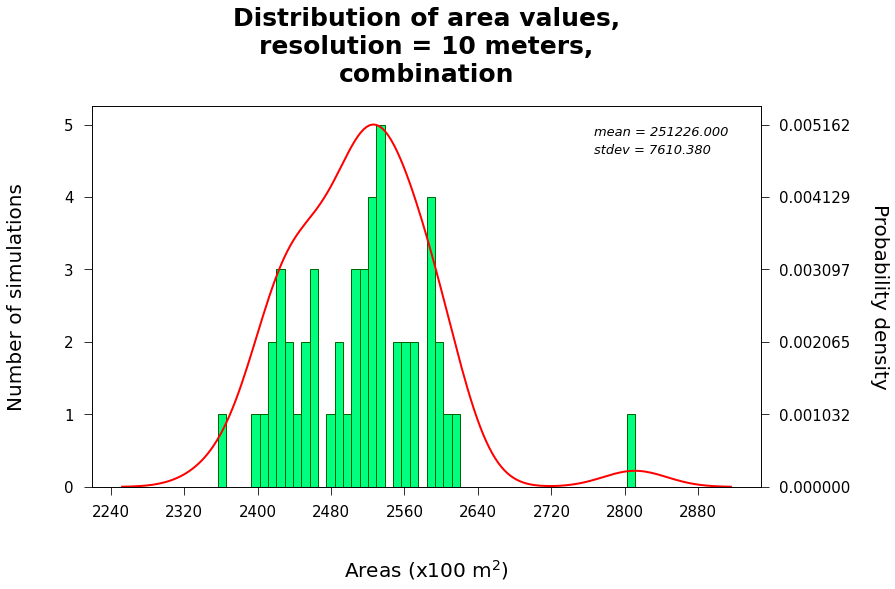

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))

plot_area(
    ax,
    statistic_dict['area'],
    resolution,
    [0.75, 0.95],
    'b',
    addition_title
)

save_plot(
    transform_selection,
    fig,
    f"area histogram",
    'png',
    300
)

Maximum number of buildings: 4
Minimum number of buildings: 1
Mean of number of buildings: 2.14
Standard deviation of number of buildings: 0.5349041493385445


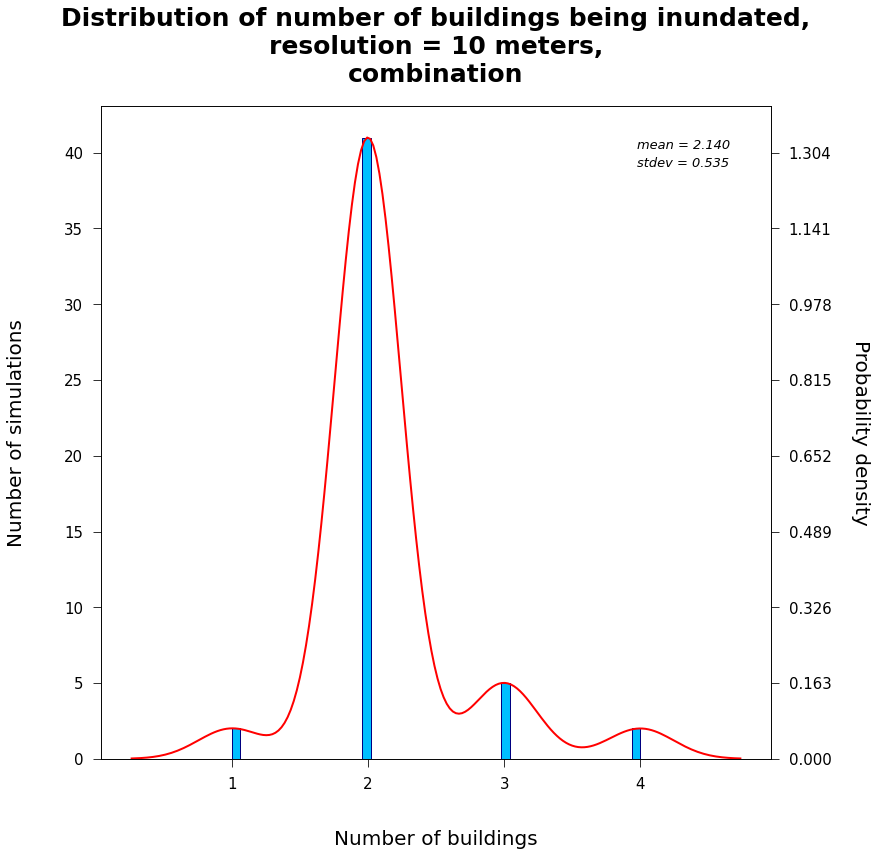

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))

plot_building(
    ax,
    statistic_dict['building'],
    resolution,
    [0.8, 0.95],
    'b',
    addition_title
)

save_plot(
    transform_selection,
    fig,
    f"building histogram",
    'png',
    300
)

In [18]:
# fig, ax = plt.subplots(figsize=(50, 15))

# # Plot area
# scatter_area_transformation(
#     "tx",
#     resolution,
#     ax,
#     statistic_dict['area']
# )

# save_plot(
#     transform_selection,
#     fig,
#     f"area scatterplot",
#     'png',
#     50
# )

-------------------------------------------------------------------------------------------------------------------------------

# Looping

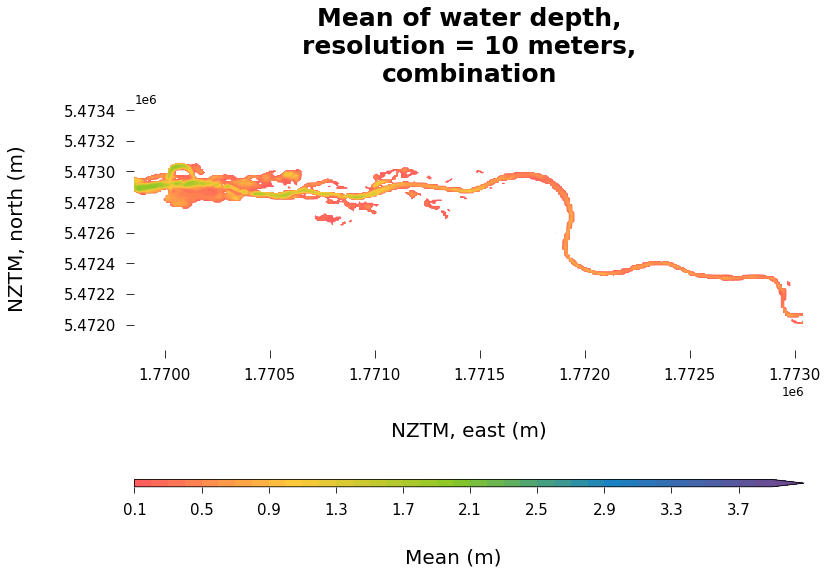

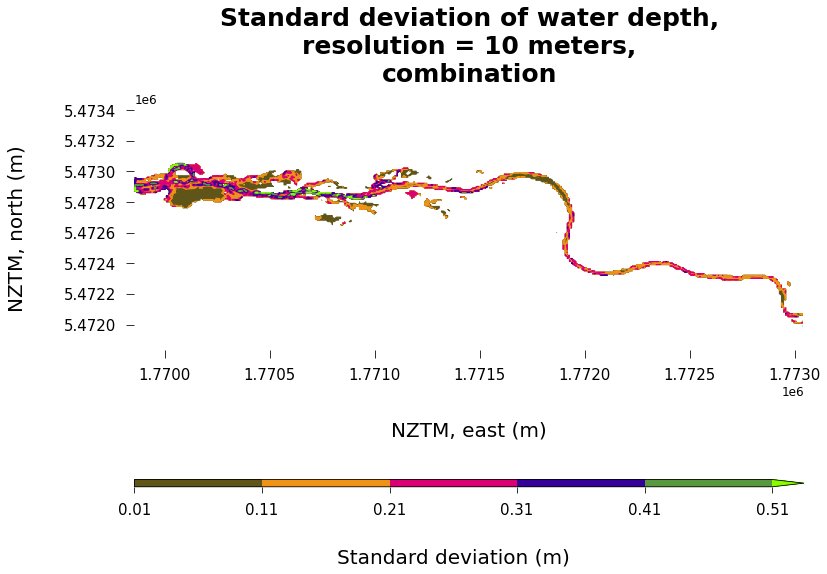

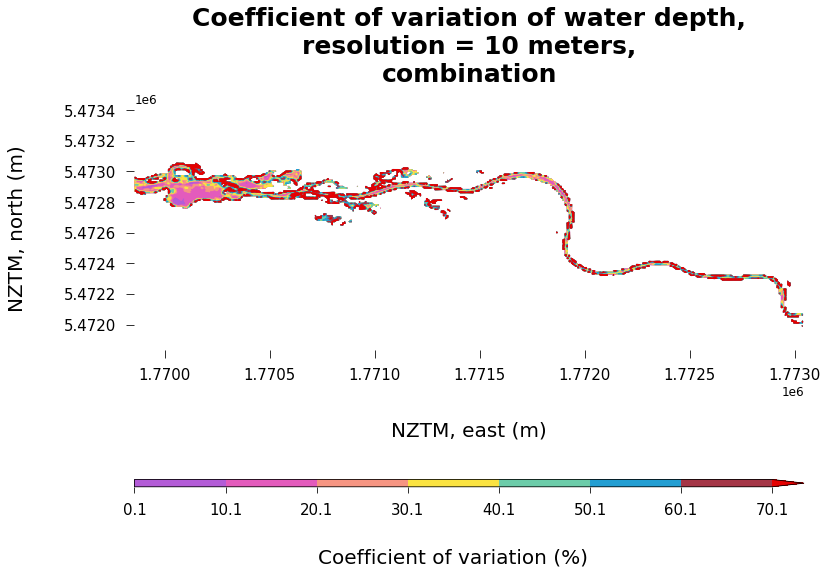

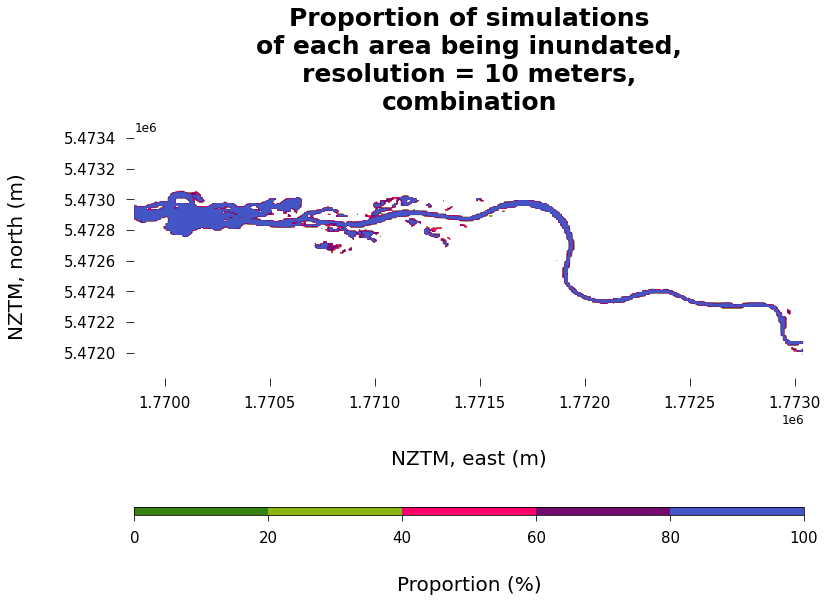

In [19]:
for each_method in ['mean', 'sd', 'cv', 'cell']:
    statistical_selection = each_method
    if statistical_selection == 'mean':
        a = [0.1, 4, 0.1]
        b = [0.1, 4, 0.4]
        c = np.arange(0.1, 3.9, 0.1)
        color_selection = hex_list9
        extend_color = "max"
        x_upper_limit_sign = "+"
        y_upper_limit = None

    elif statistical_selection == 'sd':
        a = [0.01, 0.6, 0.1]
        b = [0.01, 0.6, 0.1]
        c = np.arange(0.01, 0.55, 0.02)
        color_selection = hex_list87
        extend_color = "max"
        x_upper_limit_sign = "+"
        y_upper_limit = None

    elif statistical_selection == 'cv':
        a = [0.1, 80, 10]
        b = [0.1, 80, 10]
        c = np.arange(0.1, 73, 2)
        color_selection = hex_list77
        extend_color = "max"
        x_upper_limit_sign = "+"
        y_upper_limit = None

    else:
        a = [0, 102, 20.0001] # put 20.0001 to trick contour map color bar to include the maximum level
        b = [0, 102, 20]
        c = np.arange(0, 102, 2)
        color_selection = hex_list106
        extend_color = "neither"
        x_upper_limit_sign = ""
        y_upper_limit = 600

    fig, ax = plt.subplots(figsize=(12, 7))

    plotting_map(
        statistic_dict[statistical_selection],
        resolution,
        statistical_selection,
        ax,
        fig,
        color_selection,
        "horizontal",
        extend_color,
        a,
        addition_title
    )

    save_plot(
        transform_selection,
        fig,
        statistical_selection,
        'png',
        300
    )

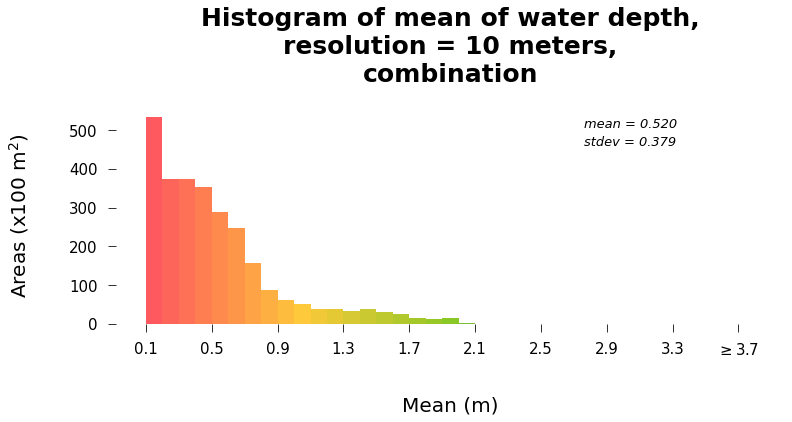

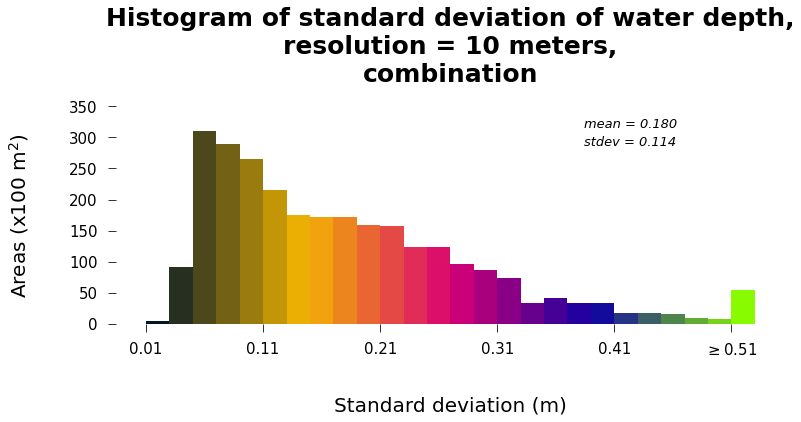

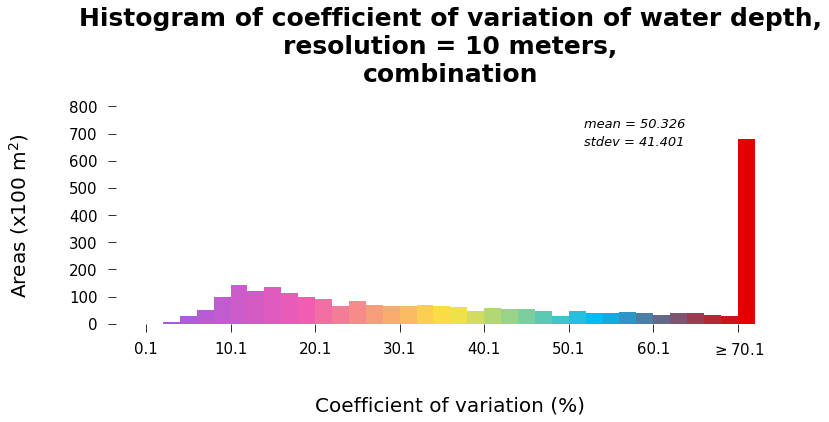

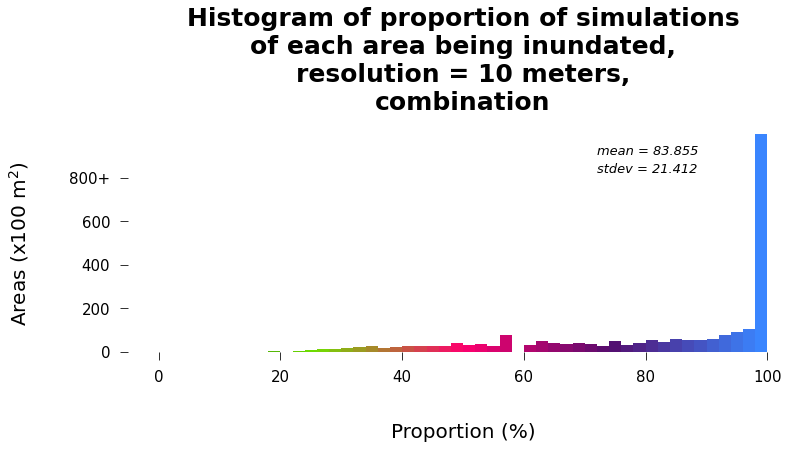

In [20]:
for each_method in ['mean', 'sd', 'cv', 'cell']:
    statistical_selection = each_method
    
    if statistical_selection == 'mean':
#         a = [0.1, 4, 0.1]
        b = [0.1, 4, 0.4]
        c = np.arange(0.1, 3.9, 0.1)
        color_selection = hex_list9
        text_box_location = [0.7, 0.95]
        x_upper_limit_sign = r'$\geq $'
        y_upper_limit = None

    elif statistical_selection == 'sd':
#         a = [0.01, 0.6, 0.1]
        b = [0.01, 0.6, 0.1]
        c = np.arange(0.01, 0.55, 0.02)
        color_selection = hex_list87
        text_box_location = [0.7, 0.95]
        x_upper_limit_sign = r'$\geq $'
        y_upper_limit = None

    elif statistical_selection == 'cv':
#         a = [0.1, 80, 10]
        b = [0.1, 80, 10]
        c = np.arange(0.1, 73, 2)
        color_selection = hex_list77
        text_box_location = [0.7, 0.95]
        x_upper_limit_sign = r'$\geq $'
        y_upper_limit = None

    else:
#         a = [0, 102, 20]
        b = [0, 102, 20]
        c = np.arange(0, 102, 2)
        color_selection = hex_list106
        text_box_location = [0.7, 0.95]
        x_upper_limit_sign = ""
        if resolution == 2:
            y_upper_limit = 30000
        elif resolution == 5:
            y_upper_limit = 5000
        elif resolution == 10:
            y_upper_limit = 1000 # 1100 for comparing with resolution, below 1000 (maybe 350) for translation
        else:
            y_upper_limit = 5000
            
    fig, ax = plt.subplots(figsize=(12, 4))

    plotting_histogram(
        statistic_dict[statistical_selection],
        resolution,
        statistical_selection,
        plt, ax,
        color_selection,
        b,
        c,
        text_box_location,
        x_upper_limit_sign,
        y_upper_limit,
        addition_title
    )

    save_plot(
        transform_selection,
        fig,
        f"{statistical_selection} histogram",
        'png',
        300
    )